In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

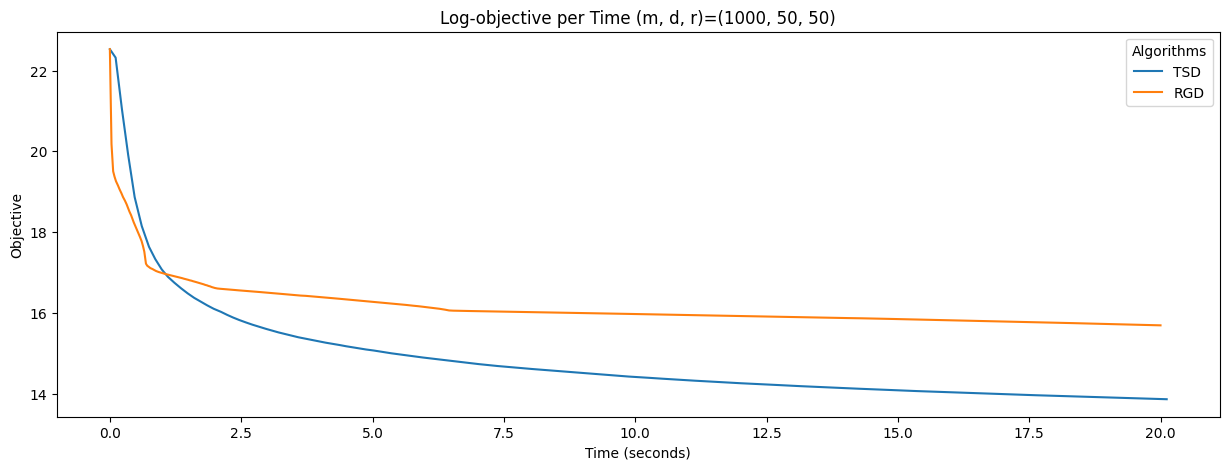

In [37]:
with open('wishart_1000_50_50.json') as f:
    df = json.loads(f.read())

fig, ax = plt.subplots(figsize=[15, 5])

sns.lineplot(y=np.log(df['tsd_objective']), x=np.cumsum(df['tsd_time']), label='TSD', ax=ax)
sns.lineplot(y=np.log(df['rgd_objective']), x=np.cumsum(df['rgd_time']), label='RGD', ax=ax)

ax.legend(title='Algorithms')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Objective')
ax.set_title('Log-objective per Time for Wishart (m, d, r)=(1000, 50, 50)');

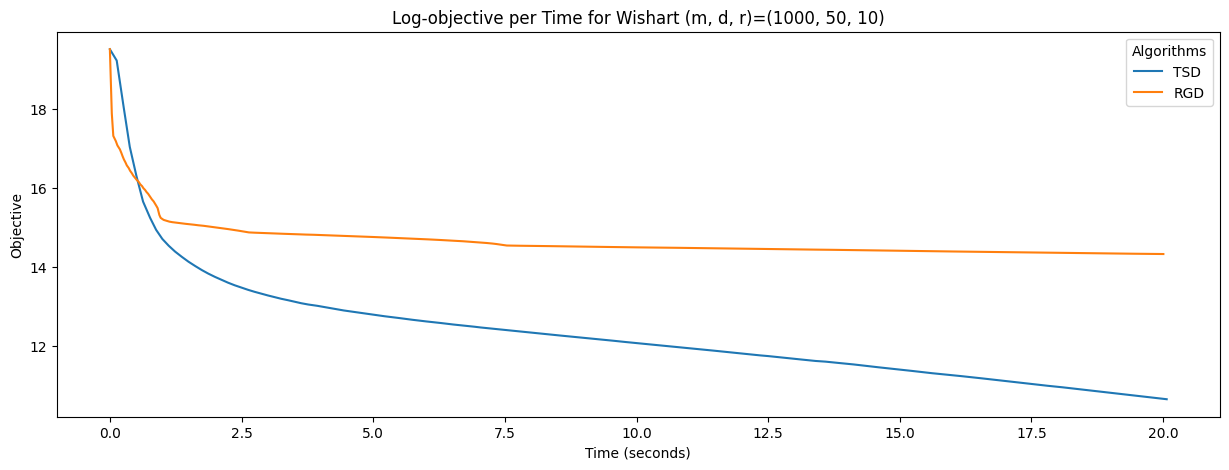

In [39]:
with open('wishart_1000_50_10.json') as f:
    df = json.loads(f.read())

fig, ax = plt.subplots(figsize=[15, 5])

sns.lineplot(y=np.log(df['tsd_objective']), x=np.cumsum(df['tsd_time']), label='TSD', ax=ax)
sns.lineplot(y=np.log(df['rgd_objective']), x=np.cumsum(df['rgd_time']), label='RGD', ax=ax)

ax.legend(title='Algorithms')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Objective')
ax.set_title('Log-objective per Time for Wishart (m, d, r)=(1000, 50, 10)');